In [1]:
import time
durations = {}

In [2]:
start = time.clock()
import yt
import os
import H5
import re
import SimulationIO as SIO
import RegionCalculus as RC
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
end = time.clock()

/home/jmiller/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
dt = end - start
print "Time to load yt = {} seconds".format(dt)
durations['startup'] = dt

Time to load yt = 6.194042 seconds


## Data Inspection

In [4]:
base_dir='/home/jmiller/programming/SimulationIO-yt-tests'
source_dir=base_dir+'/'+'cactus'

fname = "bns-0000"
fname += '.s5'
fpath=source_dir+'/'+fname

iterations = [0,16384]
iteration = iterations[1]
timelevel = 0

configurationname='iteration.{:0>10}-timelevel.{}'.format(iteration,
                                                          timelevel)
print fpath
print configurationname

/home/jmiller/programming/SimulationIO-yt-tests/cactus/bns-0000.s5
iteration.0000016384-timelevel.0


In [5]:
f = H5.H5File(fpath,H5.H5F_ACC_RDONLY)
p = SIO.readProject(f)
cnames = list(p.configurations.iterkeys())
print cnames
f.close()

['global', 'iteration.0000000000-timelevel.0', 'iteration.0000016384-timelevel.0']


In [6]:
cnames = filter(lambda x: x !='global',cnames)
print cnames

['iteration.0000000000-timelevel.0', 'iteration.0000016384-timelevel.0']


In [7]:
iterations = map(lambda x: int(x.split('.')[1].split('-')[0]),cnames)
print iterations

[0, 16384]


In [8]:
start = time.clock()
ds = yt.load(fpath,
             domain_left_edge=[-1048,-1048,-24],
             domain_dds=[8,8,8],
             configuration=configurationname)
dt = end - start
print "Time to load dataset = {} seconds".format(dt)
durations['dataset'] = dt

yt : [INFO     ] 2016-05-24 11:04:02,201 SimulationIO: Configuration "iteration.0000016384-timelevel.0"
yt : [INFO     ] 2016-05-24 11:04:02,203 SimulationIO: Discretization "iteration.0000016384-timelevel.0-level.00"
yt : [INFO     ] 2016-05-24 11:04:02,204 SimulationIO: SubDiscretization "iteration.0000016384-timelevel.0-map.000-level.01"
yt : [INFO     ] 2016-05-24 11:04:02,205 SimulationIO: SubDiscretization "iteration.0000016384-timelevel.0-map.000-level.02"
yt : [INFO     ] 2016-05-24 11:04:02,206 SimulationIO: SubDiscretization "iteration.0000016384-timelevel.0-map.000-level.03"
yt : [INFO     ] 2016-05-24 11:04:02,206 SimulationIO: SubDiscretization "iteration.0000016384-timelevel.0-map.000-level.04"
yt : [INFO     ] 2016-05-24 11:04:02,207 SimulationIO: SubDiscretization "iteration.0000016384-timelevel.0-map.000-level.05"
yt : [INFO     ] 2016-05-24 11:04:02,208 SimulationIO: SubDiscretization "iteration.0000016384-timelevel.0-map.000-level.06"
yt : [INFO     ] 2016-05-24 11:0

Time to load dataset = -26.861982 seconds


In [9]:
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	   256	       8388608	           204
  1	   256	       2048000	           127
  2	   256	       2309120	           133
  3	   256	       2526720	           137
  4	   256	       2984960	           144
  5	   256	       3910400	           158
  6	   256	       4199040	           162
----------------------------------------------
   	  1792	      26366848


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 5.981e-21 Mpc
	Width: 5.981e-15 pc
	Width: 1.234e-09 AU
	Width: 1.846e+04 cm


In [10]:
ds.field_list

[('simulationio', 'ADMBASE::alp'),
 ('simulationio', 'ADMBASE::beta[0]'),
 ('simulationio', 'ADMBASE::beta[1]'),
 ('simulationio', 'ADMBASE::beta[2]'),
 ('simulationio', 'ADMBASE::g[00]'),
 ('simulationio', 'ADMBASE::g[01]'),
 ('simulationio', 'ADMBASE::g[02]'),
 ('simulationio', 'ADMBASE::g[11]'),
 ('simulationio', 'ADMBASE::g[12]'),
 ('simulationio', 'ADMBASE::g[22]'),
 ('simulationio', 'HYDROBASE::Y_e'),
 ('simulationio', 'HYDROBASE::rho'),
 ('simulationio', 'HYDROBASE::temperature'),
 ('simulationio', 'HYDROBASE::vel[0]'),
 ('simulationio', 'HYDROBASE::vel[1]'),
 ('simulationio', 'HYDROBASE::vel[2]'),
 ('simulationio', 'HYDROBASE::w_lorent[0]'),
 ('simulationio', 'HYDROBASE::w_lorent[1]'),
 ('simulationio', 'HYDROBASE::w_lorent[2]'),
 ('simulationio', 'THC_CORE::volform')]

In [11]:
maxrefined = [g for g in ds.index.grids if g.Level==6]

In [12]:
def get_size(g,d):
    return g.ActiveDimensions[d]

In [13]:
xsizes = sorted(set([get_size(g,0) for g in maxrefined]))
ysizes = sorted(set([get_size(g,1) for g in maxrefined]))
zsizes = sorted(set([get_size(g,2) for g in maxrefined]))

In [14]:
print xsizes
print ysizes
print zsizes

[12, 19, 21, 23, 27, 28, 29]
[18, 20, 24, 25, 26]
[23, 27, 30, 38, 42]


In [15]:
maxrefined[0].ds

<weakproxy at 0x7f60d5090e68 to SimulationIODataset at 0x7f60d50924d0>

yt : [INFO     ] 2016-05-24 11:04:05,886 Reading 234082 cells for fields ['HYDROBASE::Y_e']
yt : [INFO     ] 2016-05-24 11:04:08,863 xlim = -25.000000 25.000000
yt : [INFO     ] 2016-05-24 11:04:08,863 ylim = -25.000000 25.000000
yt : [INFO     ] 2016-05-24 11:04:08,866 xlim = -25.000000 25.000000
yt : [INFO     ] 2016-05-24 11:04:08,867 ylim = -25.000000 25.000000
yt : [INFO     ] 2016-05-24 11:04:08,869 Making a fixed resolution buffer of (('gas', 'electron_fraction')) 800 by 800
yt : [INFO     ] 2016-05-24 11:04:11,422 Saving plot bns-sliceplot-it-16384.png



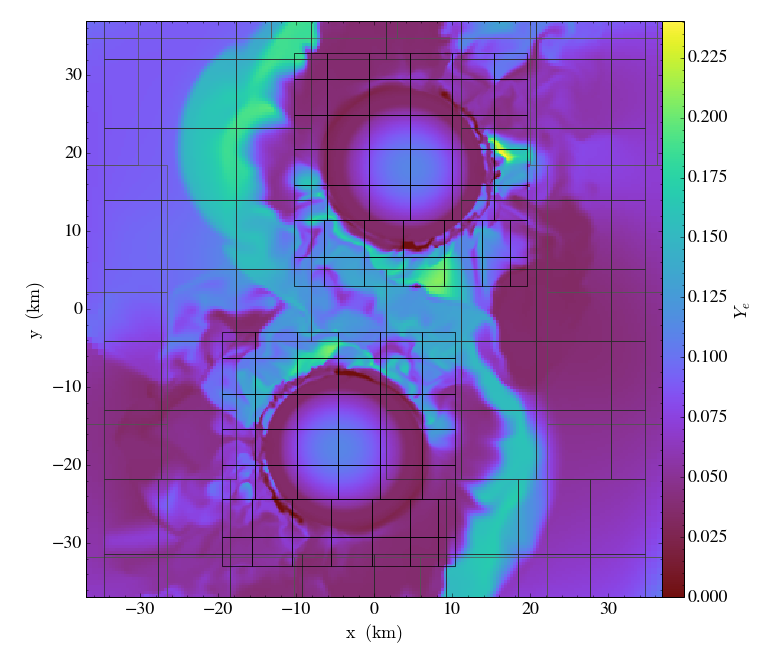

time to slice = 6.570225 sencods


In [16]:
start = time.clock()
p = yt.SlicePlot(ds,'z','electron_fraction',center = [0,0,0],width=50)
p.set_log('electron_fraction',False)
p.annotate_grids()
p.save('bns-sliceplot-it-{}.png'.format(iteration))
p.show()
end = time.clock()
dt = end - start
print "time to slice = {} sencods".format(dt)
durations['slice']=dt

yt : [INFO     ] 2016-05-24 11:04:12,904 xlim = -50.000000 50.000000
yt : [INFO     ] 2016-05-24 11:04:12,905 ylim = -50.000000 50.000000
yt : [INFO     ] 2016-05-24 11:04:12,908 xlim = -50.000000 50.000000
yt : [INFO     ] 2016-05-24 11:04:12,910 ylim = -50.000000 50.000000
yt : [INFO     ] 2016-05-24 11:04:12,912 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800
yt : [INFO     ] 2016-05-24 11:04:13,863 Saving plot bns-gridlevel-it-16384.png



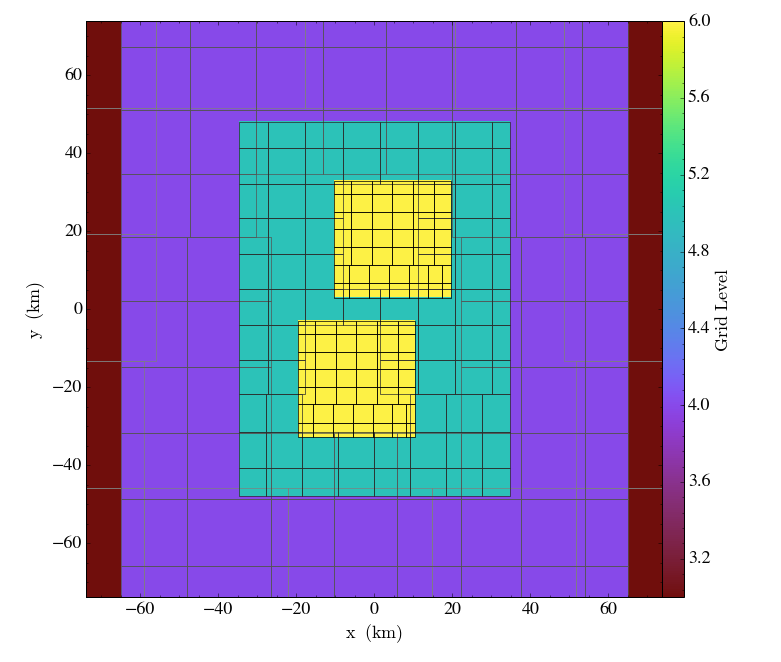

In [17]:
p = yt.SlicePlot(ds,'z','grid_level',center = [0,0,0],width=100)
p.set_log('grid_level',False)
p.annotate_grids()
p.save('bns-gridlevel-it-{}.png'.format(iteration))
p.show()

In [18]:
start = time.clock()

In [19]:
c = [0,0,0]
L = [0,0,1]
W = 50
image = yt.OffAxisProjectionPlot(ds,L,'HYDROBASE::rho',c,width=W)

yt : [INFO     ] 2016-05-24 11:04:14,806 xlim = -0.012207 0.012207
yt : [INFO     ] 2016-05-24 11:04:14,807 ylim = -0.012207 0.012207
yt : [INFO     ] 2016-05-24 11:04:14,808 zlim = -0.500000 0.500000
yt : [INFO     ] 2016-05-24 11:04:14,809 Making a fixed resolution buffer of (('simulationio', 'HYDROBASE::rho')) 800 by 800
yt : [INFO     ] 2016-05-24 11:04:14,810 Creating default volume
yt : [INFO     ] 2016-05-24 11:04:15,949 Reading 27900 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-24 11:04:15,965 Reading 29700 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-24 11:04:15,981 Reading 30690 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-24 11:04:15,998 Reading 32670 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-24 11:04:16,017 Reading 30690 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-24 11:04:16,032 Reading 32670 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-24 11:04:16,050 Reading 30690 cells fo

yt : [INFO     ] 2016-05-24 11:05:25,874 Saving plot bns-off-axis-projection-plot-it-16384.png



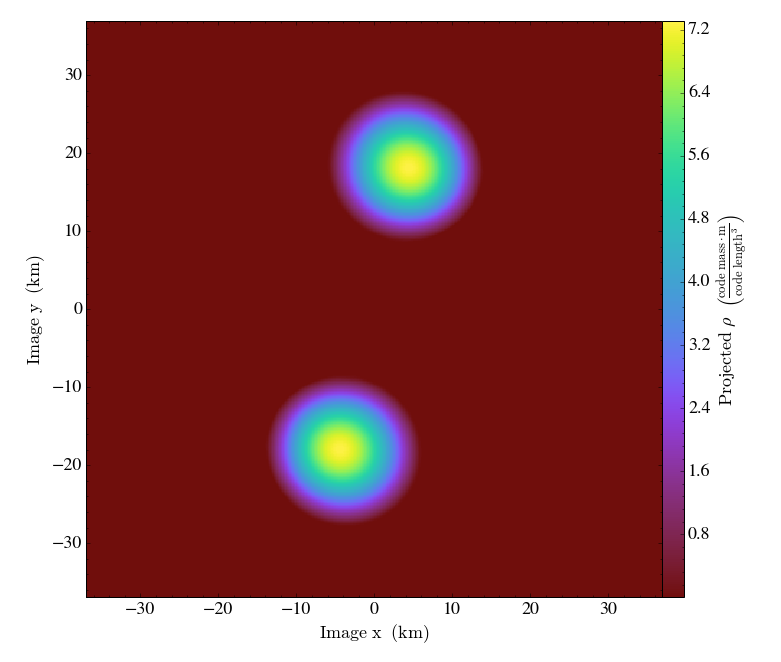

In [20]:
image.set_log('HYDROBASE::rho',False)
image.save('bns-off-axis-projection-plot-it-{}.png'.format(iteration))
image.show()

In [21]:
end = time.clock()
dt = end - start
print "time to project = {} secondds".format(dt)
durations['project'] = dt

time to project = 72.925811 secondds


In [22]:
for k,v in durations.iteritems():
    print "time to {} = {} seconds".format(k,v)

time to project = 72.925811 seconds
time to slice = 6.570225 seconds
time to startup = 6.194042 seconds
time to dataset = -26.861982 seconds


In [23]:
dir(image)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__iter__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_axes_unit_names',
 '_callbacks',
 '_cbar_minorticks',
 '_colorbar_label',
 '_colorbar_valid',
 '_colormaps',
 '_current_field',
 '_data_valid',
 '_field_transform',
 '_font_color',
 '_font_properties',
 '_frb',
 '_frb_generator',
 '_get_axes_labels',
 '_initialize_dataset',
 '_minorticks',
 '_periodic',
 '_plot_type',
 '_plot_valid',
 '_recreate_frb',
 '_repr_html_',
 '_send_zmq',
 '_set_font_properties',
 '_set_window',
 '_setup_origin',
 '_setup_plots',
 '_splat_color',
 '_switch_ds',
 '_xlabel',
 '_ylabel',
 'annotate_arrow',
 'annotate_cell_edges',
 'annotate_clear',
 'annotate_contour',
 'annotate_halos',
 'annotate_image_line',
 'annotate_line',
 'annotate_line_integral_convolution',

In [24]:
a = [0,1,2]
b=['0','1','2']
for a,b in zip(a,b):
    print a,b

0 0
1 1
2 2


yt : [INFO     ] 2016-05-24 11:05:27,999 Reading 13861248 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-24 11:05:36,842 Reading 10258320 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-24 11:05:43,390 Projection completed
yt : [INFO     ] 2016-05-24 11:05:43,391 xlim = -25.000000 25.000000
yt : [INFO     ] 2016-05-24 11:05:43,392 ylim = -25.000000 25.000000
yt : [INFO     ] 2016-05-24 11:05:43,394 xlim = -25.000000 25.000000
yt : [INFO     ] 2016-05-24 11:05:43,395 ylim = -25.000000 25.000000
yt : [INFO     ] 2016-05-24 11:05:43,397 Making a fixed resolution buffer of (('simulationio', 'HYDROBASE::rho')) 800 by 800



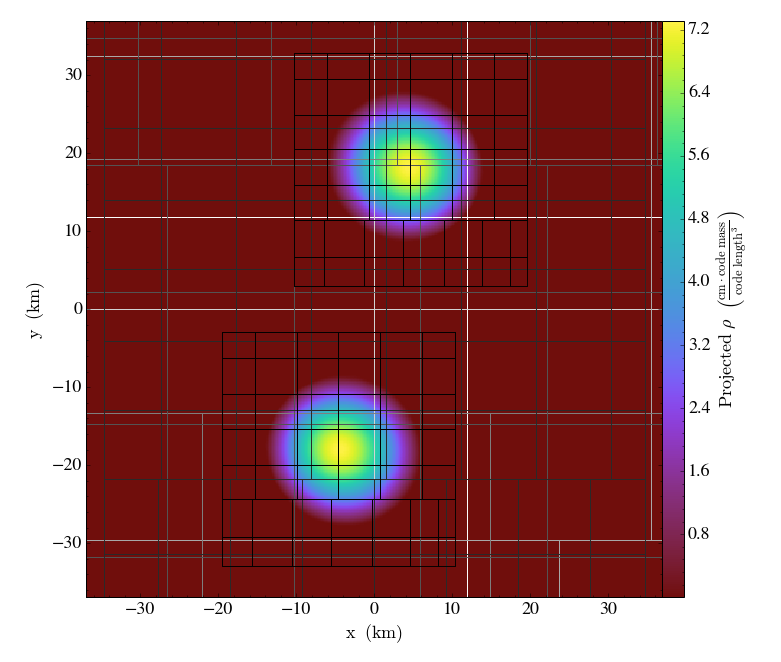

time to on-axis project = 19.271095 sencods


In [25]:
start = time.clock()
p = yt.ProjectionPlot(ds,'z','HYDROBASE::rho',center = [0,0,0],width=50)
p.set_log('HYDROBASE::rho',False)
p.annotate_grids()
#p.save('bns-sliceplot-it-{}.png'.format(iteration))
p.show()
end = time.clock()
dt = end - start
print "time to on-axis project = {} sencods".format(dt)
durations['on-axis-proj']=dt